In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('benin-malanville.csv')
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [5]:
df.describe(include ='all')

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
unique,525600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2022-08-08 23:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,NaN,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,NaN,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,NaN,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,NaN,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,NaN,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN


In [7]:
null_report = df.isna().sum()
null_report

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [8]:
threshold = 0.05 * len(df)
null_report[null_report > threshold]

Comments    525600
dtype: int64

In [9]:
null_report[null_report > threshold] #columns with 5%  null value

Comments    525600
dtype: int64

In [12]:
#Check for Outlier 
from scipy.stats import zscore
cols_to_check = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
df_z = df[cols_to_check].apply(zscore)
outliers = df_z[df_z.abs() > 3].any(axis = 1)
print(f"Outiliers found: {outliers.sum()} rows")

Outiliers found: 7740 rows


In [13]:
df_clean = df.copy()
df_clean[cols_to_check] = df_clean[cols_to_check].apply(lambda col: col.fillna(col.median()))
df_clean = df_clean[~outliers]
df_clean

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-08-08 23:56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN


In [14]:
df_clean.to_csv("data/benin_clean.csv", index=False)

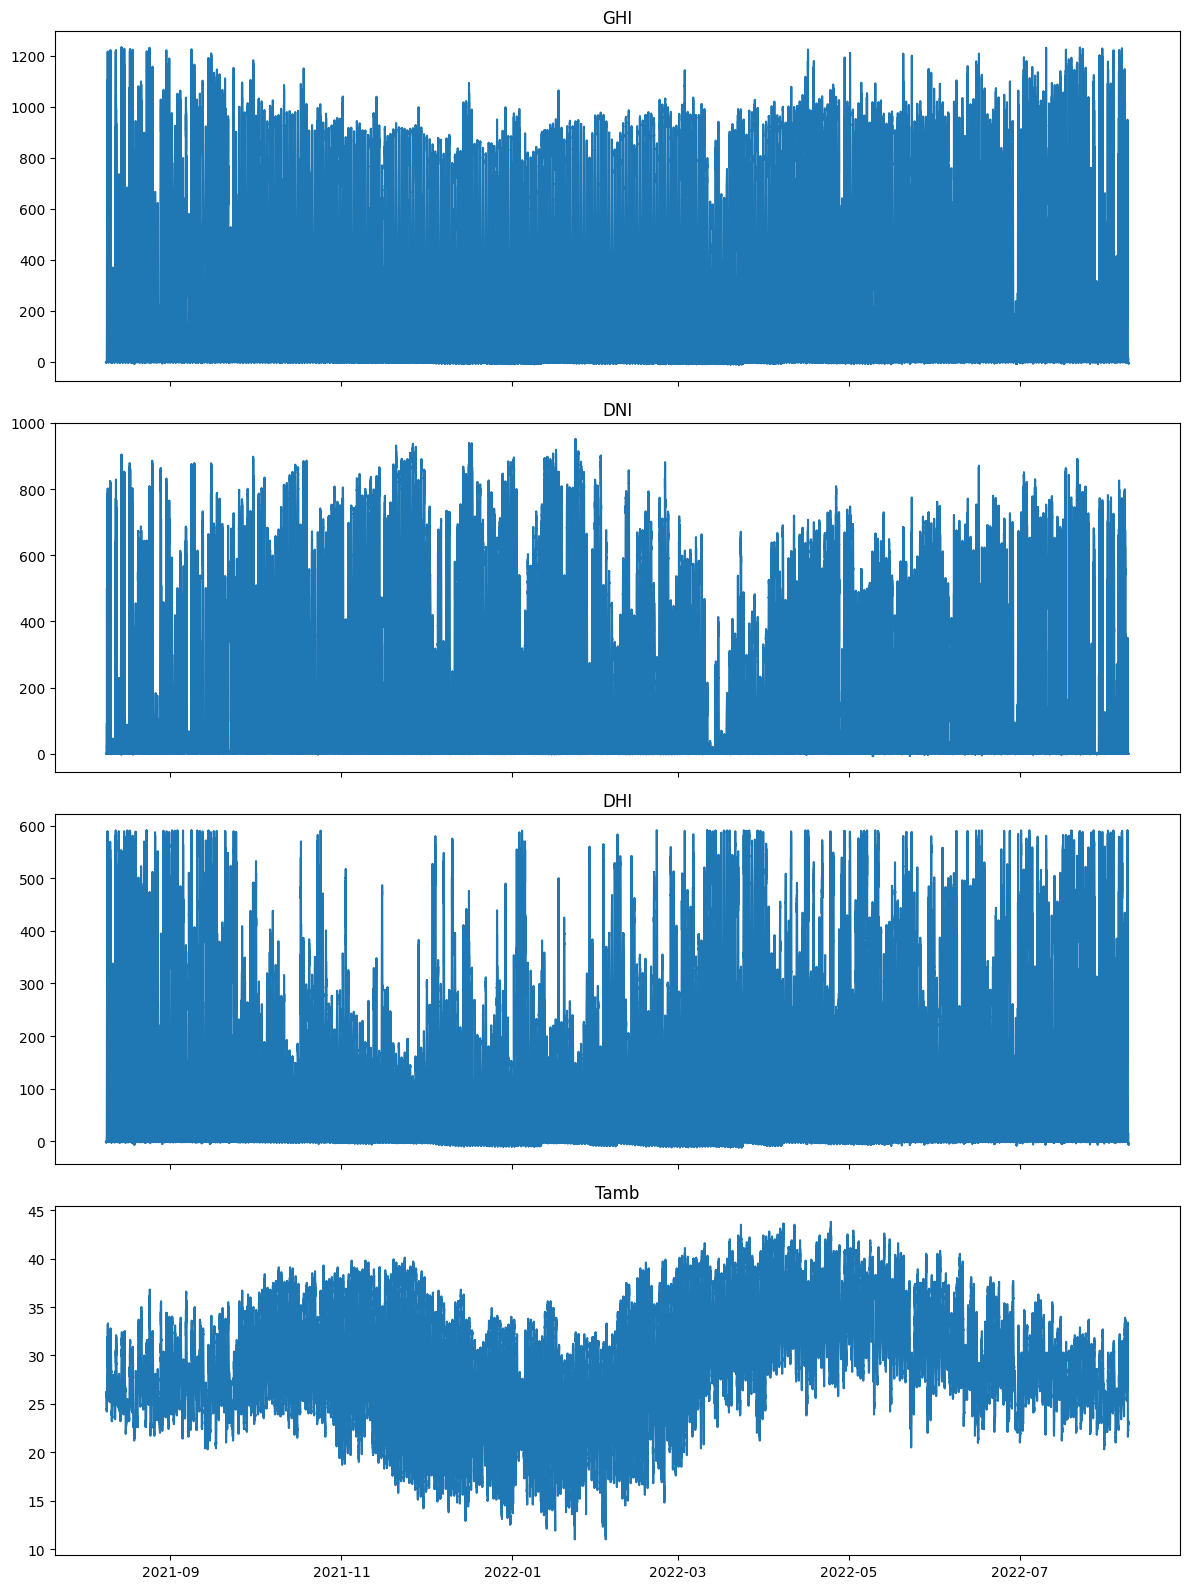

In [16]:
import matplotlib.pyplot as plt
import plotly.express as px
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
# Plotting
fig, axs = plt.subplots(4, 1, figsize=(12, 16), sharex=True)
for i, col in enumerate(["GHI", "DNI", "DHI", "Tamb"]):
    axs[i].plot(df_clean["Timestamp"], df_clean[col])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

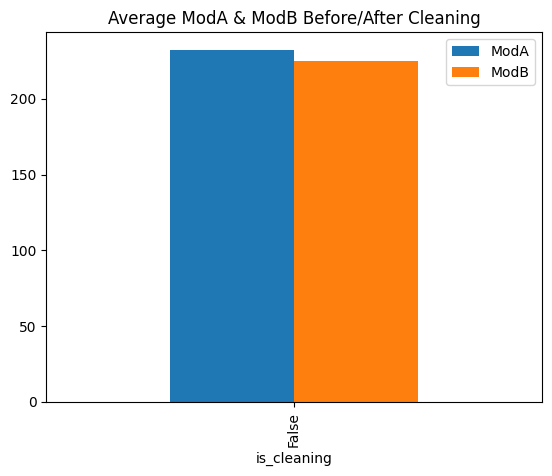

In [17]:
df_clean['is_cleaning'] = outliers  # Or use actual cleaning flag if exists
avg_mod = df_clean.groupby('is_cleaning')[['ModA', 'ModB']].mean()

avg_mod.plot(kind='bar', title='Average ModA & ModB Before/After Cleaning')
plt.show()


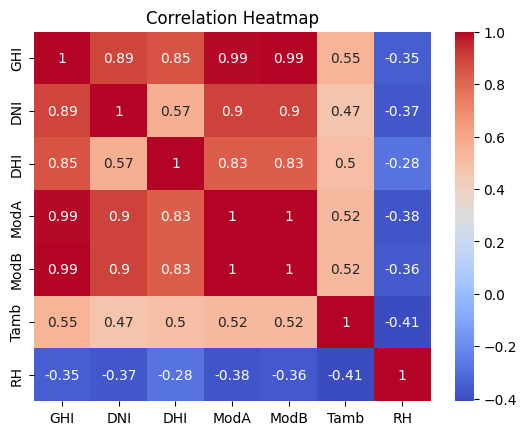

In [21]:
import seaborn as sns
corr_cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "Tamb", "RH"]
sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


<Axes: xlabel='WS', ylabel='GHI'>

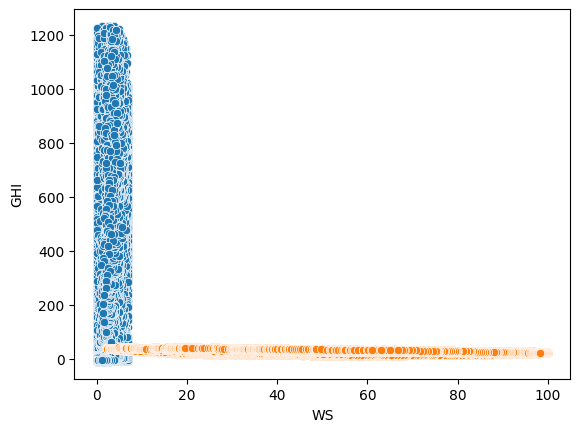

In [22]:
sns.scatterplot(data=df_clean, x="WS", y="GHI")
sns.scatterplot(data=df_clean, x="RH", y="Tamb")

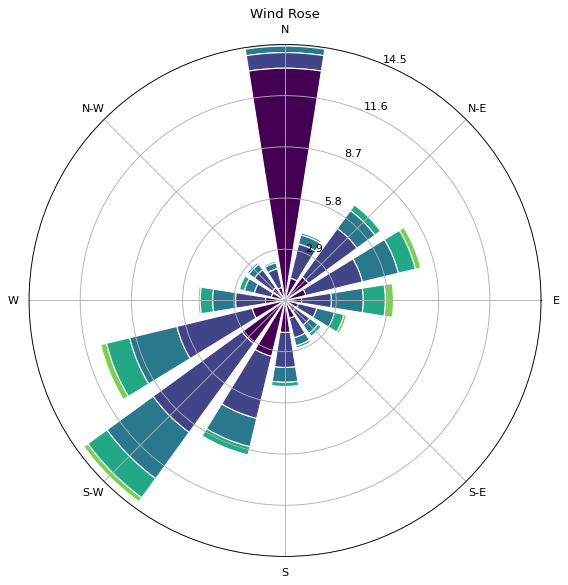

In [24]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

ax = WindroseAxes.from_ax()
ax.bar(df_clean["WD"], df_clean["WS"], normed=True, opening=0.8, edgecolor='white')
ax.set_title("Wind Rose")
plt.show()


<Axes: >

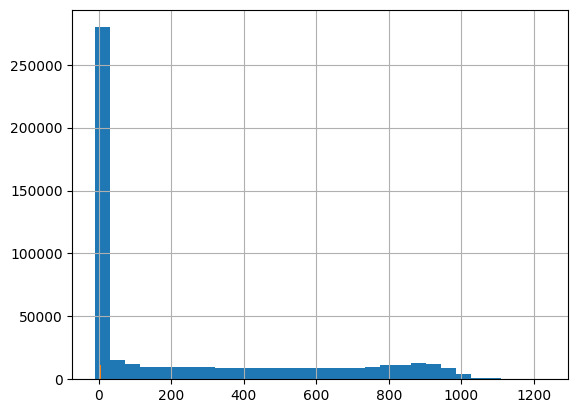

In [25]:
df_clean["GHI"].hist(bins=30)
df_clean["WS"].hist(bins=30)


<Axes: xlabel='RH', ylabel='Tamb'>

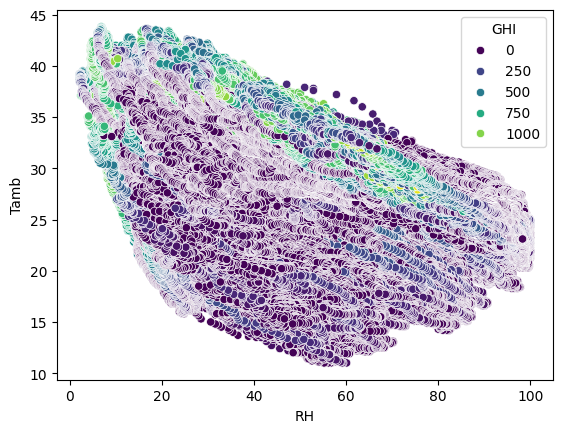

In [26]:
sns.scatterplot(data=df_clean, x="RH", y="Tamb", hue="GHI", palette="viridis")


In [32]:
import plotly.io as pio
pio.renderers.default = 'browser'

fig = px.scatter(df_clean, x="GHI", y="Tamb", size="RH", color="BP", title="GHI vs Tamb (Bubble=RH)")
fig.show()
